<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/WaltDisneyMovies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>[Libraries](#scrollTo=XGM-SDkCmijl)

>>[Scraping the infobox](#scrollTo=J5I1eaWCmfHX)

>>>>[Loading the webpage](#scrollTo=KjA2cebEm6o9)

>>>>[Converting to a beautiful soup object](#scrollTo=6sCAyt_kngLm)

>>>>[Printing out the HTML code](#scrollTo=z1eli14UnlEd)

>>>>[Infobox](#scrollTo=0HkZV_XI07Ua)

>>>>[Saving rows to the dictionary](#scrollTo=_0C4hLtY16hE)

>>[Scraping all of the infoboxes](#scrollTo=gCH53pzSHqUQ)

>>>>[Loading the webpage](#scrollTo=-vy8Vm32IBJi)

>>>>[Converting to a beautiful soup object](#scrollTo=mAjmG1f9IDSk)

>>>>[Printing the HTML code](#scrollTo=x_ejwipuIP-H)

>>>>[Table with movies and the links](#scrollTo=GTt5U61lJH08)

>>>>[Get a link for a single movie](#scrollTo=T6bD-0IuLTGB)

>>>>[Get a title for a single movie](#scrollTo=gk4A5p_sNLsf)

>>>>[get_infobox function](#scrollTo=hJUbbZXfLrTR)

>>>>[Creating a list of dictionaries of infoboxes](#scrollTo=HRw8RiHBHw0k)

>>[Saving data (json)](#scrollTo=8X1n6eufVIjx)

>>[Loading data (json)](#scrollTo=N5rrkfN2RU2C)

>>[Cleaning the data](#scrollTo=qEyRL4KpXMv9)

>>>>[Removing the references [1]](#scrollTo=by1Q2Tm3YlhR)

>>>>[Splitting up the long strings (separated with  tags in Wiki)](#scrollTo=tHCnYhiAdE8n)

>>>>[Converting 'Running time' to integer](#scrollTo=XgoEsf6Sssce)

>>>>[Money conversion](#scrollTo=SLgqdLURznpz)

>>>>>[money_conversion function](#scrollTo=ET9LZd-321jR)

>>>>>[Implementation](#scrollTo=0grw4WFbJS6_)

>>>>>[Tests](#scrollTo=DO0XFXxjJOG6)

>>>>[Converting dates into datetime objects](#scrollTo=E_Ruj5PvR24w)

>>>>>[Date conversion function](#scrollTo=Hdkol4bHSvTZ)

>>>>>[Implementation](#scrollTo=hu8t5c5qXnnU)

>>[Saving the cleaned data](#scrollTo=aYoHZchKYg-j)

>>>>[Json doesn't work for datatime objects - using pickle instead](#scrollTo=0QqW21LdY4tl)

>>>>[Saving data (Pickle)](#scrollTo=ehvKVtOfZDIg)

>>>>[Loading data (Pickle)](#scrollTo=1xhh8za1aAwz)

>>[Attaching movie scores from IMDb, etc.](#scrollTo=KxnzwCvNdfAQ)

>>>>[Functions](#scrollTo=PeZh6HjWkPnK)

>>>>[Implementation](#scrollTo=i1eLcMvwkR-2)

>>>>[itemgetter lib to get multiple keys](#scrollTo=3u5cTnEIoaGR)

>>[Creating a copy of the dataset (json and CSV)](#scrollTo=4gied4fVm8WR)

>>>>[Reversing the datatime object to string](#scrollTo=AyR6t_mFo-F_)

>>>>[Saving data (pandas, CSV)](#scrollTo=10uDNeP8rC_8)

>>>>[Remove columns with NaNs](#scrollTo=lJSNgKm1ulDs)



##Libraries

In [ ]:
from bs4 import BeautifulSoup as bs
import requests

##Scraping the infobox

####Loading the webpage

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/Toy_Story_3')

#### Converting to a beautiful soup object

In [ ]:
soup = bs(r.content)

####Printing out the HTML code

In [ ]:
contents = soup.prettify()
# print(contents)

####Infobox

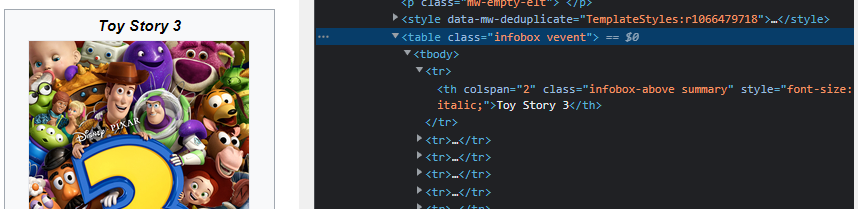

In [ ]:
infobox = soup.find(class_ = 'infobox vevent')
# print(infobox.prettify())

In [ ]:
infobox_rows = infobox.find_all('tr')
# for row in infobox_rows:
#   print(row.prettify())

####Saving rows to the dictionary

In [ ]:
def get_content_value(row_data):
  if row_data.find('li'):
    return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]
  else:
    return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

In [ ]:
movie_info = {}

for index, row in enumerate(infobox_rows):
  if index == 0:
    movie_info['title'] = row.find('th').get_text(' ', strip = True)
  elif index == 1: #Obrazek
    continue
  # elif index == 2:
  #   movie_info['director'] = row.find('td').get_text()
  else:
    content_key = row.find('th').get_text(' ', strip = True)
    content_value = get_content_value(row.find('td'))
    movie_info[content_key] = content_value

movie_info

{'title': 'Toy Story 3',
 'Directed by': 'Lee Unkrich',
 'Screenplay by': 'Michael Arndt',
 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'],
 'Produced by': 'Darla K. Anderson',
 'Starring': ['Tom Hanks',
  'Tim Allen',
  'Joan Cusack',
  'Don Rickles',
  'Wallace Shawn',
  'John Ratzenberger',
  'Estelle Harris',
  'Ned Beatty',
  'Michael Keaton',
  'Jodi Benson',
  'John Morris'],
 'Cinematography': ['Jeremy Lasky', 'Kim White'],
 'Edited by': 'Ken Schretzmann',
 'Music by': 'Randy Newman',
 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios'],
 'Distributed by': 'Walt Disney Studios Motion Pictures',
 'Release dates': ['June 12, 2010 ( 2010-06-12 ) ( Taormina Film Fest )',
  'June 18, 2010 ( 2010-06-18 ) (United States)'],
 'Running time': '103 minutes [1]',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$200 million [1]',
 'Box office': '$1.067 billion [1]'}

##Scraping all of the infoboxes

####Loading the webpage

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films')

####Converting to a beautiful soup object

In [ ]:
soup = bs(r.content)

####Printing the HTML code

In [ ]:
contents = soup.prettify()
# print(contents)

####Table with movies and the links

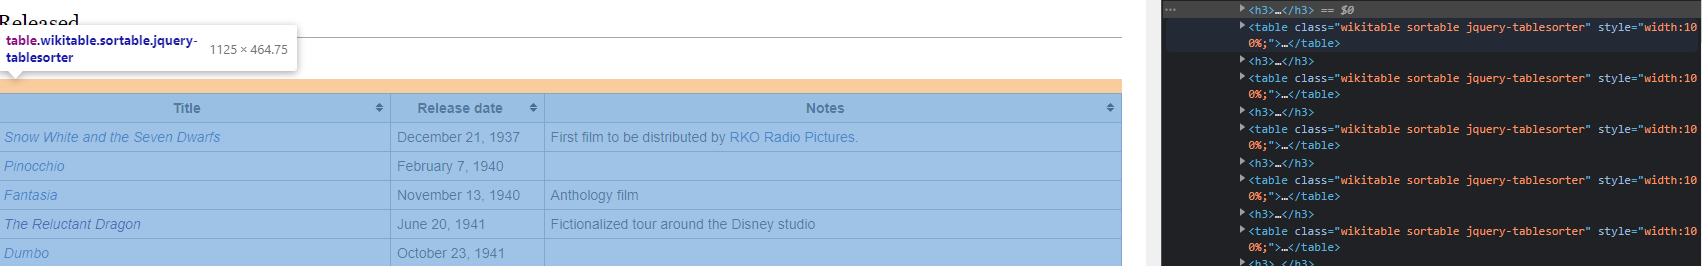

In [ ]:
movies = soup.select('.wikitable.sortable i') #"i" pozwala na pobranie jedynie tekstu pochylonego <i></i>
# movies = soup.find_all(class_ = 'wikitable sortable')
movies[:10]

[<i><a href="/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)" title="Snow White and the Seven Dwarfs (1937 film)">Snow White and the Seven Dwarfs</a></i>,
 <i><a href="/wiki/Pinocchio_(1940_film)" title="Pinocchio (1940 film)">Pinocchio</a></i>,
 <i><a href="/wiki/Fantasia_(1940_film)" title="Fantasia (1940 film)">Fantasia</a></i>,
 <i><a href="/wiki/The_Reluctant_Dragon_(1941_film)" title="The Reluctant Dragon (1941 film)">The Reluctant Dragon</a></i>,
 <i><a href="/wiki/Dumbo" title="Dumbo">Dumbo</a></i>,
 <i><a href="/wiki/Bambi" title="Bambi">Bambi</a></i>,
 <i><a href="/wiki/Saludos_Amigos" title="Saludos Amigos">Saludos Amigos</a></i>,
 <i><a href="/wiki/Victory_Through_Air_Power_(film)" title="Victory Through Air Power (film)">Victory Through Air Power</a></i>,
 <i><a href="/wiki/The_Three_Caballeros" title="The Three Caballeros">The Three Caballeros</a></i>,
 <i><a href="/wiki/Make_Mine_Music" title="Make Mine Music">Make Mine Music</a></i>]

####Get a link for a single movie

In [ ]:
movies[0].a['href']

'/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)'

####Get a title for a single movie

In [ ]:
movies[0].a['title']

'Snow White and the Seven Dwarfs (1937 film)'

#### get_infobox function

In [ ]:
def get_content_value(row_data):
  if row_data.find('li'):
    return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]
  elif row_data.find('br'):
    return [text for text in row_data.stripped_strings]
  else:
    return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

def clean_tags(soup): #Usunięcie referencji i dodatkowej daty ukrytej w elemencie <span>
  for tag in soup.find_all(['span','sup']):
    tag.decompose()

def get_infobox(url):
  r = requests.get(url)
  soup = bs(r.content)
  
  infobox = soup.find(class_ = 'infobox vevent')
  infobox_rows = infobox.find_all('tr')

  clean_tags(soup)

  movie_info = {}
  for index, row in enumerate(infobox_rows):
    if index == 0:
      movie_info['title'] = row.find('th').get_text(' ', strip = True)
    else:
      header = row.find('th')
      if header:
        content_key = row.find('th').get_text(' ', strip = True)
        content_value = get_content_value(row.find('td'))
        movie_info[content_key] = content_value

  return movie_info

In [ ]:
get_infobox('https://en.wikipedia.org/wiki/Howl%27s_Moving_Castle_(film)')

{'title': "Howl's Moving Castle",
 'Japanese': '',
 'Hepburn': 'Hauru no Ugoku Shiro',
 'Directed by': 'Hayao Miyazaki',
 'Screenplay by': 'Hayao Miyazaki',
 'Based on': ["Howl's Moving Castle", 'by', 'Diana Wynne Jones'],
 'Produced by': 'Toshio Suzuki',
 'Starring': ['Chieko Baisho', 'Takuya Kimura', 'Akihiro Miwa'],
 'Cinematography': 'Atsushi Okui',
 'Edited by': 'Takeshi Seyama',
 'Music by': 'Joe Hisaishi',
 'Production company': 'Studio Ghibli',
 'Distributed by': 'Toho',
 'Release dates': ['5 September 2004 ( Venice )', '20 November 2004 (Japan)'],
 'Running time': '119 minutes',
 'Country': 'Japan',
 'Language': 'Japanese',
 'Budget': ['¥', '2.4 billion', 'US$24 million'],
 'Box office': ['¥', '23.2 billion', 'US$236 million (worldwide)']}

####Creating a list of dictionaries of infoboxes

In [ ]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films')
soup = bs(r.content)
movies = soup.select('.wikitable.sortable i a') #Wybór elementu <a> wewnątrz <i>, aby nie pobierać danych z innej kolumny
len(movies)

540

In [ ]:
movie_info_list = []
base = 'https://en.wikipedia.org/'

In [ ]:
# for index, movie in enumerate(movies):
#   # if index == 10: #Do debugowania - pobranie wypisanie pierwszych 10 elementów
#   #   break
#   if index % 10 == 0: #Do wyświetlania numeru aktualnie przetwarzanego filmu
#     print(index)
#   try:
#     relative_link = movie['href']
#     title = movie['title']
#     full_link = base + relative_link
#     movie_info_list.append(get_infobox(full_link))
#   except Exception as e:
#     print(movie.get_text())
#     print(e)

In [ ]:
movie_info_list[0]

{'title': 'Snow White and the Seven Dwarfs',
 'Directed by': ['David Hand',
  'William Cottrell',
  'Wilfred Jackson',
  'Larry Morey',
  'Perce Pearce',
  'Ben Sharpsteen'],
 'Written by': ['Ted Sears',
  'Richard Creedon',
  'Otto Englander',
  'Dick Rickard',
  'Earl Hurd',
  'Merrill De Maris',
  'Dorothy Ann Blank',
  'Webb Smith'],
 'Based on': ['Snow White', 'by The', 'Brothers Grimm'],
 'Produced by': 'Walt Disney',
 'Starring': ['Adriana Caselotti',
  'Lucille La Verne',
  'Harry Stockwell',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins',
  'Moroni Olsen',
  'Stuart Buchanan'],
 'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'RKO Radio Pictures',
 'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
  'February 4, 1938 (United States)'],
 'Running time': '83 minutes',
 'Country': 'United States',
 'Language': 'English',

In [ ]:
len(movie_info_list)

522

##Saving data (json)

In [ ]:
import json

def save_data(title, data):
  with open(title, 'w', encoding = 'utf-8') as f:
    json.dump(data, f, ensure_ascii = False, indent = 2)

In [ ]:
# save_data('WaltDisneyMovies_cleaned.json', movie_info_list)

##Loading data (json)

In [ ]:
def load_data(title):
  with open(title, encoding = 'utf-8') as f:
    return json.load(f)

In [ ]:
movie_info_list = load_data('/content/drive/MyDrive/Projekty/Walt Disney Movies/WaltDisneyMovies_cleaned.json')

##Cleaning the data

####Removing the references [1]

In [ ]:
# def clean_tags(soup): #Usunięcie referencji i dodatkowej daty ukrytej w elemencie <span>
#   for tag in soup.find_all(['span','sup']):
#     tag.decompose()

####Splitting up the long strings (separated with <br> tags in Wiki)

In [ ]:
# def get_content_value(row_data):
#   if row_data.find('li'):
#     return [li.get_text(' ', strip = True).replace('\xa0', ' ') for li in row_data.find_all('li')]

  # elif row_data.find('br'):
  #   return [text for text in row_data.stripped_strings] # <------------------------ 

#   else:
#     return row_data.get_text(' ', strip = True).replace('\xa0', ' ')

####Converting 'Running time' to integer

In [ ]:
#Examples
print([movie.get('Running time', 'NaN') for movie in movie_info_list][:10])

['83 minutes', '88 minutes', '126 minutes', '74 minutes', '64 minutes', '70 minutes', '42 minutes', '65 min', '71 minutes', '75 minutes']


In [ ]:
def time_to_int(running_time):
  if running_time == "NaN":
    return None #Return pod ifem, aby nie wykonywać reszty kodu
  # if isinstance(running_time, list) #Sprawdzenie, czy Running time jest listą
  if type(running_time) is list:
    return int(running_time[0].split(' ',1)[0])
  else:
    return int(running_time.split(' ',1)[0])

# time_to_int('NaN')
# time_to_int(['85 minutes', '95 min'])

In [ ]:
for movie in movie_info_list:
  movie['Running time [min]'] = time_to_int(movie.get('Running time', 'NaN'))

In [ ]:
movie_info_list[:10]

[{'title': 'Snow White and the Seven Dwarfs',
  'Directed by': ['David Hand',
   'William Cottrell',
   'Wilfred Jackson',
   'Larry Morey',
   'Perce Pearce',
   'Ben Sharpsteen'],
  'Written by': ['Ted Sears',
   'Richard Creedon',
   'Otto Englander',
   'Dick Rickard',
   'Earl Hurd',
   'Merrill De Maris',
   'Dorothy Ann Blank',
   'Webb Smith'],
  'Based on': ['Snow White', 'by The', 'Brothers Grimm'],
  'Produced by': 'Walt Disney',
  'Starring': ['Adriana Caselotti',
   'Lucille La Verne',
   'Harry Stockwell',
   'Roy Atwell',
   'Pinto Colvig',
   'Otis Harlan',
   'Scotty Mattraw',
   'Billy Gilbert',
   'Eddie Collins',
   'Moroni Olsen',
   'Stuart Buchanan'],
  'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
  'Production company': 'Walt Disney Productions',
  'Distributed by': 'RKO Radio Pictures',
  'Release dates': ['December 21, 1937 ( Carthay Circle Theatre )',
   'February 4, 1938 (United States)'],
  'Running time': '83 minutes',
  'Country': 'Unit

In [ ]:
print([movie.get('Running time [min]', 'NaN') for movie in movie_info_list][:10])

[83, 88, 126, 74, 64, 70, 42, 65, 71, 75]


####Money conversion

In [ ]:
#Examples
print([movie.get('Budget', 'NaN') for movie in movie_info_list][:10])

['$1.49 million', '$2.6 million', '$2.28 million', '$600,000', '$950,000', '$858,000', 'NaN', '$788,000', 'NaN', '$1.35 million']


In [ ]:
#Examples
print([movie.get('Box office', 'NaN') for movie in movie_info_list][:10])

['$418 million', '$164 million', '$76.4–$83.3 million (United States and Canada)', '$960,000 (worldwide rentals)', '>$1.3 million (est. United States/Canada rentals, 1941)', '$267.4 million', '$1.135 million (worldwide rentals)', '$799,000', '$3.355 million (worldwide rentals)', '$3.275 million (worldwide rentals)']


In [ ]:
None in [movie.get('Budget', 'NaN') for movie in movie_info_list]

False

#####money_conversion function

In [ ]:
import re

#* - zero lub więcej wystąpień
#? - występuje lub nie
#| - lub
#\s - spacja, \d - cyfra, {3} - liczba cyfr

number = r'\d+(,\d{3})*\.*\d*' #Jedna lub więcej cyfr (\d+), grupa trzech cyfr po przecinku (,\d{3}) lub nic(*), kropka (\.) lub nic, zero lub więcej cyfr (\d) lub 
amounts = r"thousand|million|billion"

word_re = rf"\${number}(-|–|\sto\s)?({number})?\s({amounts})"
value_re = rf"\${number}"

def word_to_value(word):
  values_dict = {"thousand": 1000,
                 "million": 1000000,
                 "billion": 1000000000}
  return values_dict[word]

def parse_word_syntax(string):
  value_string = re.search(number, string).group()
  value = float(value_string.replace(',', '')) #Usunięcie przecinka ze stringa w celu konwersji na float
  word = re.search(amounts, string, flags = re.I).group().lower() #flags = re.I -> Ignorowanie wielkich liter w tysiącach, milionach itd.
  word_value = word_to_value(word)
  return value*word_value

def parse_value_syntax(string):
  value_string = re.search(number, string).group()
  value = float(value_string.replace(',',''))
  return value

def money_conversion(money):
  if money == 'NaN':
    return None

  if isinstance(money, list): #Sprawdzenie czy jest listą
    money = money[0]

  value_syntax = re.search(value_re, money) #f-string ze wzorcem (number)
  words_syntax = re.search(word_re, money, flags = re.I)

  if words_syntax:
    return parse_word_syntax(words_syntax.group())

  elif value_syntax:
    return parse_value_syntax(value_syntax.group())
  
  else:
    return None

In [ ]:
mon = 'None'
print(money_conversion(mon))

None


#####Implementation

In [ ]:
for movie in movie_info_list:
  movie['Budget [$]'] = money_conversion(movie.get('Budget', 'NaN'))
  movie['Box office [$]'] = money_conversion(movie.get('Box office', 'NaN'))

#####Tests

In [ ]:
print([movie.get('Budget [$]', 'NaN') for movie in movie_info_list][:10])

[1490000.0, 2600000.0, 2280000.0, 600000.0, 950000.0, 858000.0, None, 788000.0, None, 1350000.0]


In [ ]:
print([movie.get('Box office [$]', 'NaN') for movie in movie_info_list][:10])

[418000000.0, 164000000.0, 83300000.0, 960000.0, 1300000.0, 267399999.99999997, 1135000.0, 799000.0, 3355000.0, 3275000.0]


In [ ]:
money_conversion(movie_info_list[350]['Box office'])

109000000.0

In [ ]:
import pytest

def tests():
	assert money_conversion("$3 million") == 3000000
	assert money_conversion("$99 million") == 99000000
	assert money_conversion("$3.5 million") == 3500000
	assert money_conversion("$1.234 million") == 1234000
	assert money_conversion("$1.25 billion") == 1250000000
	assert money_conversion("$900.9 thousand") == 900900
	assert money_conversion("$3.5-4 million") == 3500000
	assert money_conversion("$3.5 to 4 million") == 3500000
	assert money_conversion("$950000") == 950000
	assert money_conversion("$127,850,000") == 127850000
	assert money_conversion("$10,000,000.50") == 10000000.5
	assert money_conversion("estimated $5,000,000 (USD)") == 5000000
	assert money_conversion("60 million Norwegian Kroner (around $8.7 million in 1989)") == 8700000
	assert money_conversion(['$410.6 million (gross)', '$378.5 million (net)']) == 410600000
	assert money_conversion("70 crore") is None

tests()

####Converting dates into datetime objects

In [ ]:
#Examples
print([movie.get('Release date', 'NaN') for movie in movie_info_list][100:120])

[['June 30, 1971'], ['October 7, 1971'], ['March 22, 1972 (US)'], 'July 12, 1972', ['July 5, 1972'], ['October 18, 1972'], ['December 22, 1972'], 'February 1, 1973', ['March 23, 1973'], ['June 20, 1973'], ['November 8, 1973'], ['December 14, 1973'], ['June 6, 1974'], ['July 31, 1974'], ['August 1, 1974'], 'December 20, 1974 (with Winnie the Pooh and Tigger Too )', ['February 6, 1975'], ['March 21, 1975 (United States)'], ['July 1, 1975'], ['July 9, 1975']]


In [ ]:
from datetime import datetime

dates = [movie.get('Release date', 'NaN') for movie in movie_info_list][100:120]

#####Date conversion function

In [ ]:
def clean_date(date):
  return date.split('(')[0].strip() #Podział stringa na pierwszym nawiasie i usunięcie spacji

def date_conversion(date):
  if isinstance(date, list):
    date = date[0]

  if date == 'NaN':
    return None

  date_str = clean_date(date)

  formats = ['%B %d, %Y', '%d %B %Y']
  for format in formats:
    try:
      return datetime.strptime(date_str, format).date()
    except:
      pass
  return None

for date in dates:
  print(date_conversion(date))

1971-06-30
1971-10-07
1972-03-22
1972-07-12
1972-07-05
1972-10-18
1972-12-22
1973-02-01
1973-03-23
1973-06-20
1973-11-08
1973-12-14
1974-06-06
1974-07-31
1974-08-01
1974-12-20
1975-02-06
1975-03-21
1975-07-01
1975-07-09


#####Implementation

In [ ]:
for movie in movie_info_list:
  movie['Release date (formatted)'] = date_conversion(movie.get('Release date', 'NaN'))

In [ ]:
movie_info_list[150]

{'title': 'The Fox and the Hound',
 'Directed by': ['Ted Berman', 'Richard Rich', 'Art Stevens'],
 'Story by': ['Larry Clemmons',
  'Ted Berman',
  'David Michener',
  'Peter Young',
  'Burny Mattinson',
  'Steve Hulett',
  'Earl Kress',
  'Vance Gerry'],
 'Based on': ['The Fox and the Hound', 'by', 'Daniel P. Mannix'],
 'Produced by': ['Ron Miller', 'Wolfgang Reitherman', 'Art Stevens'],
 'Starring': ['Mickey Rooney',
  'Kurt Russell',
  'Pearl Bailey',
  'Jack Albertson',
  'Sandy Duncan',
  'Jeanette Nolan',
  'Pat Buttram',
  'John Fiedler',
  'John McIntire',
  'Dick Bakalyan',
  'Paul Winchell',
  'Keith Mitchell',
  'Corey Feldman'],
 'Edited by': ['James Melton', 'Jim Koford'],
 'Music by': 'Buddy Baker',
 'Production company': 'Walt Disney Productions',
 'Distributed by': 'Buena Vista Distribution',
 'Release date': ['July 10, 1981'],
 'Running time': '83 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Budget': '$12 million',
 'Box office': '$63.5 million',
 '

##Saving the cleaned data

####Json doesn't work for datatime objects - using pickle instead

In [ ]:
# save_data('WaltDisneyMovies_cleanedformatted.json', movie_info_list) #Nie działa na datatime object

####Saving data (Pickle)

In [ ]:
import pickle

def save_data_pickle(title, data):
  with open(title, 'wb') as f:
    pickle.dump(data, f)

In [ ]:
save_data_pickle('WaltDisneyMovies_cleaned.pickle', movie_info_list)

####Loading data (Pickle)

In [ ]:
def load_data_pickle(title):
  with open(title, 'rb') as f:
    return pickle.load(f)

In [ ]:
movie_info_list = load_data_pickle('WaltDisneyMovies_cleaned.pickle')

##Attaching movie scores from IMDb, etc.

####Functions

In [ ]:
import requests
import os #Do dostępu do zmiennych systemowych, gdzie zapisany będzie apikey
import urllib #Do "upakowania" parametrów do linku

def get_omdb_info(title):
  url = 'http://www.omdbapi.com/?'
  apikey = '556eef74'
  parameters = {'apikey': apikey, 't': title}
  # parameters = {'apikey': os.environ['OMDB_apikey'], 't': title}
  params_encoded = urllib.parse.urlencode(parameters)
  full_url = url + params_encoded
  return requests.get(full_url).json()

def get_rotten_tomatoes(omdb_info):
  ratings = omdb_info.get('Ratings', [])
  for rating in ratings:
    if rating['Source'] == 'Rotten Tomatoes':
      return rating['Value']

In [ ]:
info = get_omdb_info('Into the Woods')
get_rotten_tomatoes(info)

'71%'

####Implementation

In [ ]:
for movie in movie_info_list:
  title = movie['title']
  omdb_info = get_omdb_info(title)
  movie['IMDb'] = omdb_info.get('imdbRating', 'NaN')
  movie['Metascore'] = omdb_info.get('Metascore', 'NaN')
  movie['RottenTomatoes'] = get_rotten_tomatoes(omdb_info)

####itemgetter lib to get multiple keys

In [ ]:
from operator import itemgetter

itemgetter('title', 'IMDb')(movie_info_list[1])

('Pinocchio', '7.5')

In [ ]:
save_data_pickle('/content/drive/MyDrive/Projekty/Walt Disney Movies/WaltDisneyMovies_final.pickle', movie_info_list)

##Creating a copy of the dataset (json and CSV)

In [ ]:
#Kopiowanie słownika
movie_info_copy = [movie.copy() for movie in movie_info_list]

####Reversing the datatime object to string

In [ ]:
for movie in movie_info_copy:
  current_date = movie['Release date (formatted)']
  if current_date: #nie jest None
    movie['Release date (formatted)'] = current_date.strftime("%B %d, %Y")
  else:
    movie['Release date (formatted)'] = None

In [ ]:
movie_info_copy[166]['Release date (formatted)']

'November 18, 1988'

In [ ]:
save_data('/content/drive/MyDrive/Projekty/Walt Disney Movies/WaltDisneyMovies_final.json', movie_info_copy)

####Saving data (pandas, CSV)

In [ ]:
import pandas as pd
df = pd.DataFrame(movie_info_copy)
df.head()

,title,Directed by,Written by,Based on,Produced by,Starring,Music by,Production company,Distributed by,Release dates,...,Traditional,Simplified,Original title,Layouts by,Music,Lyrics,Book,Basis,Productions,Awards
0,Snow White and the Seven Dwarfs,"[David Hand, William Cottrell, Wilfred Jackson...","[Ted Sears, Richard Creedon, Otto Englander, D...","[Snow White, by The, Brothers Grimm]",Walt Disney,"[Adriana Caselotti, Lucille La Verne, Harry St...","[Frank Churchill, Paul Smith, Leigh Harline]",Walt Disney Productions,RKO Radio Pictures,"[December 21, 1937 ( Carthay Circle Theatre ),...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pinocchio,"[Ben Sharpsteen, Hamilton Luske, Bill Roberts,...",NaN,"[The Adventures of Pinocchio, by, Carlo Collodi]",Walt Disney,"[Cliff Edwards, Dickie Jones, Christian Rub, W...","[Leigh Harline, Paul J. Smith]",Walt Disney Productions,RKO Radio Pictures,"[February 7, 1940 ( Center Theatre ), February...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fantasia,"[Samuel Armstrong, James Algar, Bill Roberts, ...",NaN,NaN,"[Walt Disney, Ben Sharpsteen]","[Leopold Stokowski, Deems Taylor]",See program,Walt Disney Productions,RKO Radio Pictures,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The Reluctant Dragon,"[Alfred Werker, (live action), Hamilton Luske,...","[Live-action:, Ted Sears, Al Perkins, Larry Cl...",NaN,Walt Disney,"[Robert Benchley, Frances Gifford, Buddy Peppe...","[Frank Churchill, Larry Morey]",Walt Disney Productions,RKO Radio Pictures,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Dumbo,"[Ben Sharpsteen, Norman Ferguson, Wilfred Jack...",NaN,"[Dumbo, the Flying Elephant, by, Helen Aberson...",Walt Disney,"[Edward Brophy, Verna Felton, Cliff Edwards, H...","[Frank Churchill, Oliver Wallace]",Walt Disney Productions,RKO Radio Pictures,"[October 23, 1941 (New York City), October 31,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Remove columns with NaNs

In [ ]:
df2 = df.iloc[:,0:32]

In [ ]:
df2.to_csv('/content/drive/MyDrive/Projekty/Walt Disney Movies/WaltDisneyMovies_final.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     522 non-null    object 
 1   Directed by               518 non-null    object 
 2   Written by                212 non-null    object 
 3   Based on                  286 non-null    object 
 4   Produced by               509 non-null    object 
 5   Starring                  483 non-null    object 
 6   Music by                  513 non-null    object 
 7   Production company        210 non-null    object 
 8   Distributed by            520 non-null    object 
 9   Release dates             186 non-null    object 
 10  Running time              506 non-null    object 
 11  Country                   462 non-null    object 
 12  Language                  498 non-null    object 
 13  Budget                    323 non-null    object 
 14  Box office